<a href="https://colab.research.google.com/github/PawanSingh7266/Mobile_price_range_prediction/blob/main/Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Mobile price range prediction**

Project Type - Classification

Contribution - Individual

Team Member 1 - Pawan Singh

# **Project Summary -**

The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors such as battery power, Bluetooth, camera quality, screen size, and more. A study was conducted to analyze the factors that influence the price range of mobile phones. The study utilized a dataset with approximately 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

The initial step in the analysis involved data wrangling, where missing values were addressed and unique values were examined. The study discovered that 180 phones had a pixel resolution height of 0, and two phones had a screen width of 0 cm. It was deemed inappropriate for a phone's screen width or pixel height to be 0, so these values were replaced with the mean values, ensuring that the dataset had no missing values.

Next, the study conducted exploratory data analysis (EDA), which revealed that phones in all price categories were evenly distributed. The analysis also indicated a positive correlation between battery capacity and the price range of mobile phones. The distribution of battery capacity gradually increased as the price range increased, suggesting that consumers might be willing to pay more for a phone with a higher battery capacity. The study found that almost half of the devices had Bluetooth, while the other half did not.

A scatter plot demonstrated a clear positive correlation between RAM and price range, with most data points clustering in the upper right corner. This indicated that as the price range increased, the amount of RAM in the device generally increased as well. The study also observed that the count of devices with dual SIM capability was higher in the very high price range. Additionally, the distribution of primary camera megapixels across different price categories remained relatively consistent, suggesting that this feature may not significantly influence the price range of mobile phones.

Analyzing the distribution of screen sizes among different price categories revealed no significant difference in distribution, implying that screen size may not be the sole determining factor for price categories. However, this uniformity in distribution could be advantageous for predictive modeling, as it suggests that screen size may not play a significant role in differentiating between price categories, allowing other features to have a more crucial role. The study also found that higher-priced phones tended to be lighter in weight compared to lower-priced ones.

Following the EDA, the study conducted hypothesis testing on three statements and addressed outliers. RAM, battery power, and pixel quality were identified as the most significant factors affecting the price range of mobile phones. Feature engineering was performed, and machine learning models such as logistic regression, random forest, and XGBoost were implemented. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameter tuning provided the best results in predicting the price range of mobile phones.

In summary, the study found that the mobile phones in the dataset were divided into four different price ranges, each with a similar number of devices. Additionally, approximately half of the devices had Bluetooth, while the other half did not. Furthermore, as the price range increased, there was a gradual increase in battery power, and RAM showed continuous growth from low-cost to high-cost phones. Moreover, higher-priced phones tended to be lighter than lower-priced ones.

# **GitHub Link -**

# **Problem Statement**

In the competitive mobile phone market, companies aim to comprehend the sales data of mobile phones and determine the factors that influence their prices. The goal is to identify relationships between various features of a mobile phone (e.g., RAM, internal memory) and its selling price range, indicating the level of price competitiveness.

By analyzing the available data, we can examine the impact of different features on the price range of mobile phones, without directly predicting the actual price. This approach allows us to understand the relative pricing levels and assess the factors that contribute to higher-priced mobile phones.

By conducting a thorough analysis and employing appropriate statistical and machine learning techniques, we can uncover insights into the relationships between specific features and price range categories. This knowledge can help companies in making informed decisions regarding their pricing strategies and product development, ultimately enhancing their competitiveness in the mobile phone market.

# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading mobile data csv file
df = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [4]:
#Dataset first view on start five columns & row
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Dataset load last five Row & columns
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [6]:
#Count Row and Columns
df.shape

(2000, 21)

### Dataset Information

In [7]:
#information of data
df.info

<bound method DataFrame.info of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_wid

In [8]:
#load data info with type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Duplicate Values

In [9]:
#dataset duplicate values
duplicate_values = len(df[df.duplicated()])
print("Number od Duplicate Value:" ,  duplicate_values)

Number od Duplicate Value: 0


### Missing Values/Null Values

In [10]:
#Missing values and null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

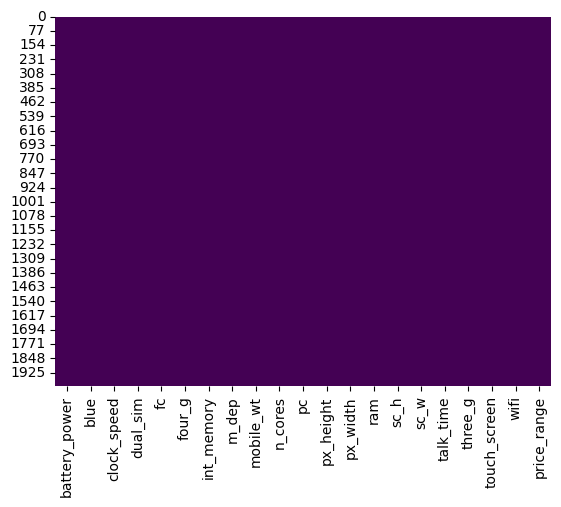

In [11]:
#visualizing the missing values
sns.heatmap(df.isnull() , cmap = 'viridis'  , cbar = False)

### What did you know about your dataset?

Observations About Dataset

1.The dataset contains 21 columns and 2000 rows

2.No duplicate values present in the dataset.

3.NO missing values present in the dataset.

## **2. Understanding Your Variables**

In [12]:
#dataset columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
#length of columns
len(df.columns)

21

In [14]:
#dataset describe
df.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [15]:
#dataset Transpose
df.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


### Variables Description

Battery_power - Total energy a battery can store in one time measured in mAh.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last when you are.

Three_g - Has 3G or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

### Check Unique Values for each variable.

In [16]:
#check unique vales for every columns
for columns in df.columns:
  unique_values = df[columns].unique()
  print(f"Unique value for {columns} : {unique_values}")

Unique value for battery_power : [ 842 1021  563 ... 1139 1467  858]
Unique value for blue : [0 1]
Unique value for clock_speed : [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique value for dual_sim : [0 1]
Unique value for fc : [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique value for four_g : [0 1]
Unique value for int_memory : [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique value for m_dep : [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique value for mobile_wt : [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

In [17]:
#Checking Unique Values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## **3. Data Wrangling**

In [18]:
# Write your code to make your dataset analysis ready.
#The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.
# count number of phones with sc_w = 0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

# count number of phones with px_height = 0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 180
Number of phones with px_height = 0: 2


In [19]:
# replace 0 values with mean value
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

# print updated dataframe
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [20]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

In [21]:
#Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### What all manipulations have you done and insights you found?

Observations

1.I have found that number of phones with pixel resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.

2.The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

3.So the 0 values are replaced with the mean values and no missing values left in the table so our data is ready for data analysis!.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### Chart - 1 - Price Range

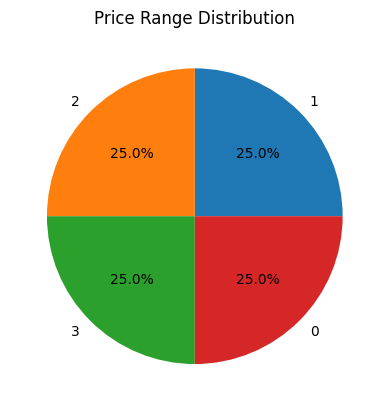

In [22]:
# Chart - 1 visualization code

#classes
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

#### 1. Why did you pick the specific chart?

I picked this chart to know the distribution of percentage of phones with price range low or high.

#### 2. What is/are the insight(s) found from the chart?

All category phones are distributed with equal price range.

### Chart - 2 - Battery Power

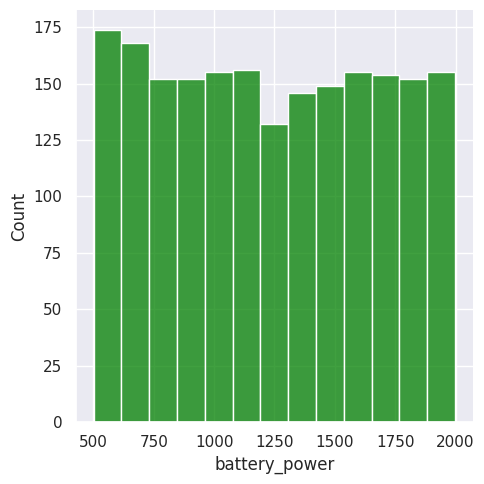

In [23]:
#chart - 2 visualization code
sns.set(rc= {'figure.figsize' : (5, 5)})
sns.displot(df['battery_power'] , color = 'green')
plt.show()

#### 1. Why did you pick the specific chart?

To know the count increasing with battery power or not.

#### 2. What is/are the insight(s) found from the chart?

This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

### Chart - 3 - Bluetooth

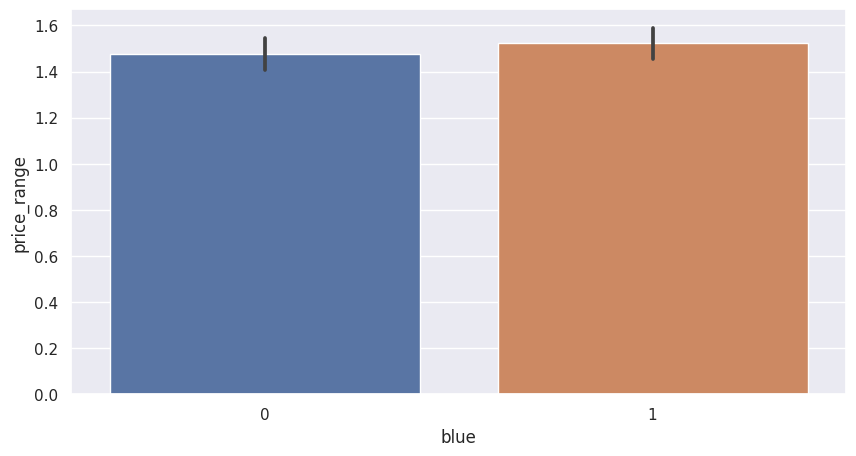

In [24]:
# Chart - 3 visualization code
fig , ax = plt.subplots(figsize = (10 , 5))
sns.barplot(data = df , x =  'blue' , y = 'price_range' , ax = ax)
plt.show()

#### 1. Why did you pick the specific chart?

To know the devices having bluetooth or not with price range .

#### 2. What is/are the insight(s) found from the chart?

Almost half the devices have Bluetooth, and half don’t

### Chart - 4 - Ram

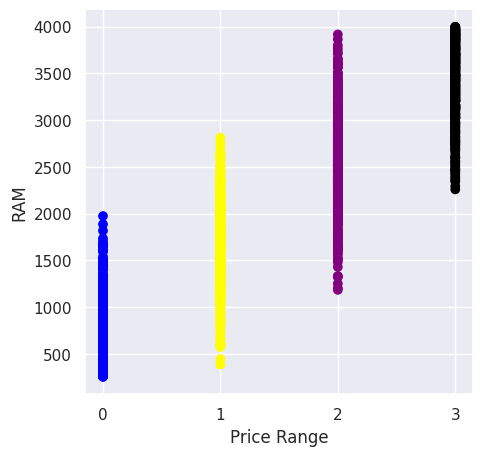

In [25]:
# Chart - 4 visualization
# Create a color map for the points based on price range
colors  = {0 : 'blue' , 1 : "yellow" , 2 : 'purple' , 3 : 'black' }
#create a scatter plot
plt.scatter(df['price_range'] , df['ram'] , c = df['price_range'].apply(lambda x : colors[x]))
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0 , 1 , 2 , 3])
plt.show()

#### 1. Why did you pick the specific chart?

To know the price relation with ram.

#### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

### Chart - 5 - dual_sim

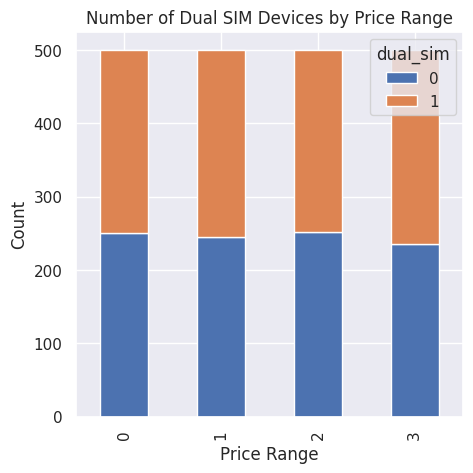

In [26]:
# Group the data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()

#### 1. Why did you pick the specific chart?

To know the price range according to dual sim using or not.



#### 2. What is/are the insight(s) found from the chart?

We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.


### Chart - 6 - Four - g

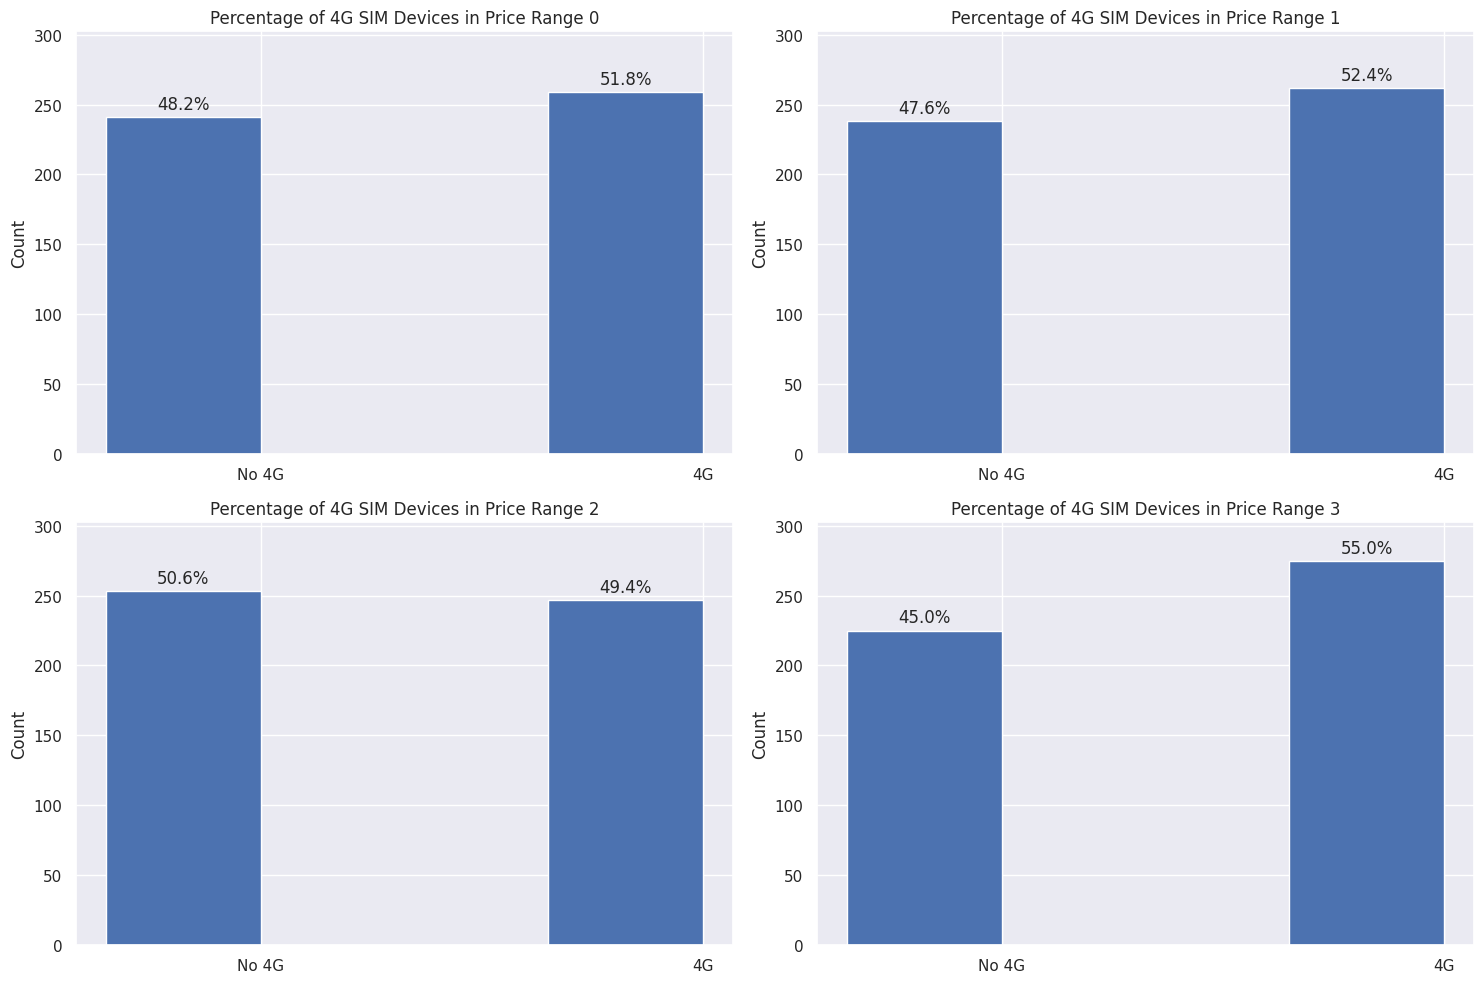

In [27]:
# Group the data by price range and 4G SIM, and count the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows, 4G SIM as columns, and the count as values
fourg_count = fourg_count.unstack()

# Create bar charts for each price range
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

To know the percentage of 4G sim of mobile phones

#### 2. What is/are the insight(s) found from the chart?

I have found that at low, medium,very high prices the mobile phones having sim in more numbers but at high prices it is showing slightly collapse.

### Chart - 7 - pixel_width

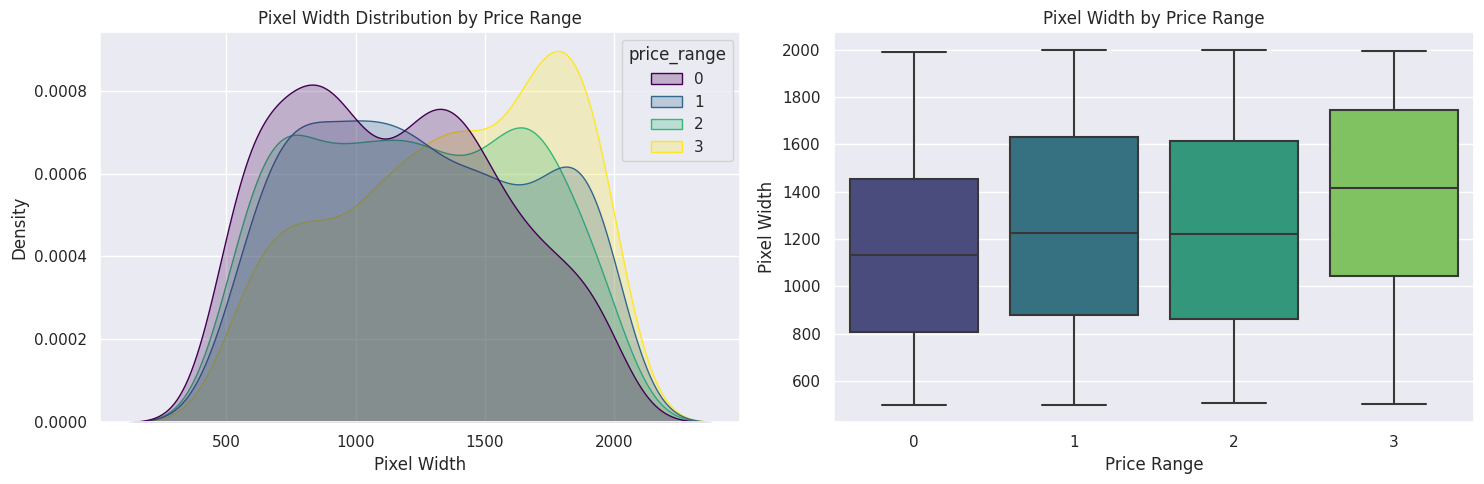

In [28]:
# Chart - 7 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


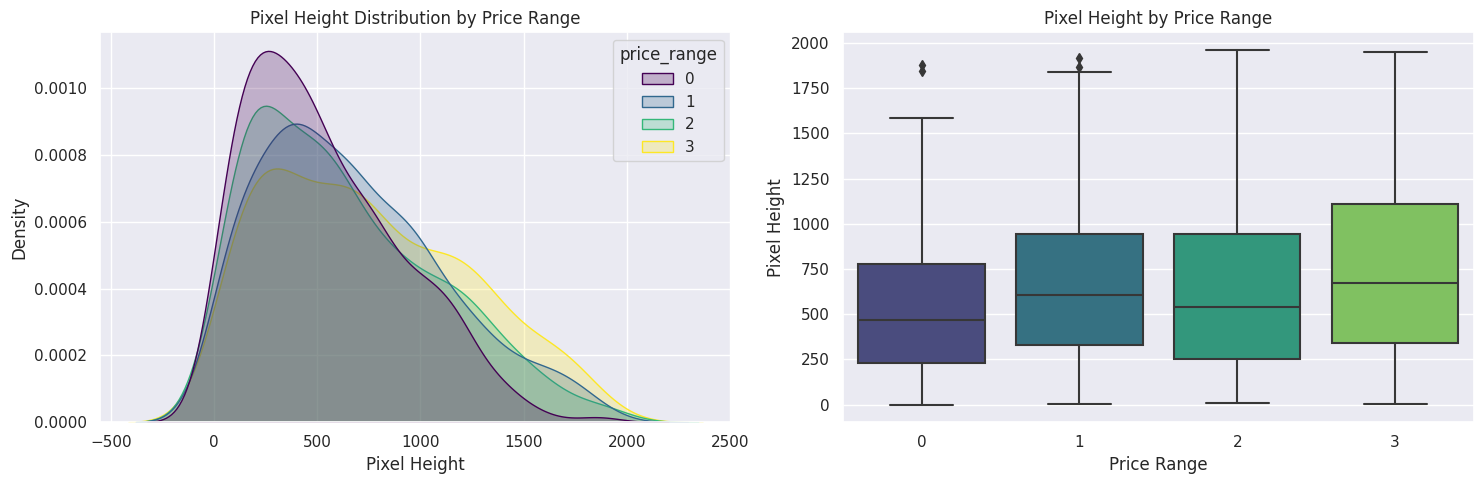

In [29]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel height for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

#### 1. Why did you pick the specific chart?

To know the pixel width on the price range.

#### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market.Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

### Chart - 8 - FC (front camera megapixels)

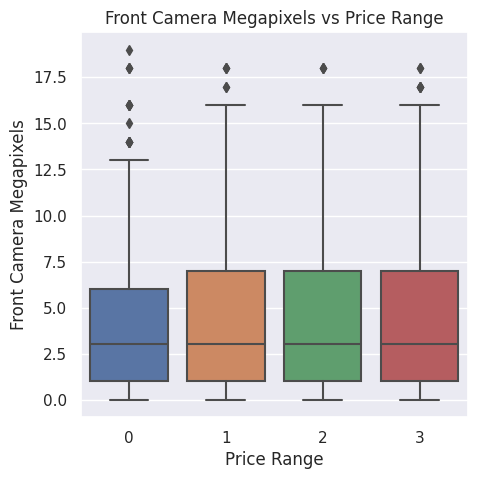

In [30]:
# Chart - 8 visualization code
# create a boxplot of front camera megapixels grouped by price range
sns.boxplot(x='price_range', y='fc', data=df)

# set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')

# show the plot
plt.show()


#### 1. Why did you pick the specific chart?


To know the impact of price range on front camera megapixels.

#### 2. What is/are the insight(s) found from the chart?


It is almost same impcact of price range in all categories.

### Chart - 9 - PC (Primary camera Megapixels)

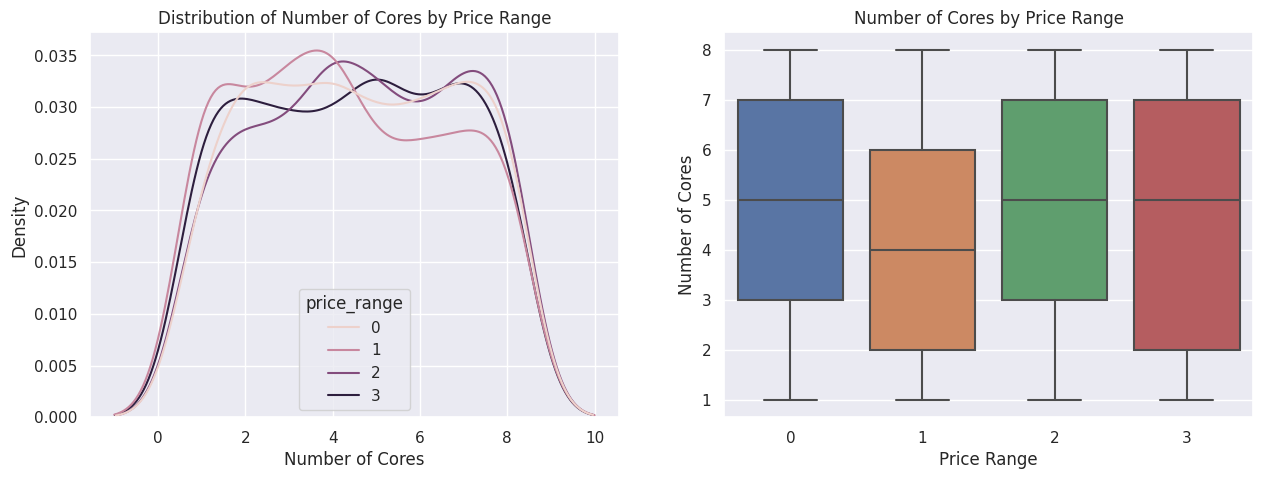

In [31]:
# Chart - 9 visualization code
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernel density estimation plot of the distribution of number of cores across price ranges
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])

# Create a box plot of the distribution of number of cores for each price range
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Show the plot
plt.show()


#### 1. Why did you pick the specific chart?

To know the distribution of number of cores by price range and number of cores by price range.

#### 2. What is/are the insight(s) found from the chart?

The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones. This consistency is a positive sign for prediction modeling, as it suggests that this feature may not be a major confounding factor in predicting the price range.

### Chart - 10 - mobile weight

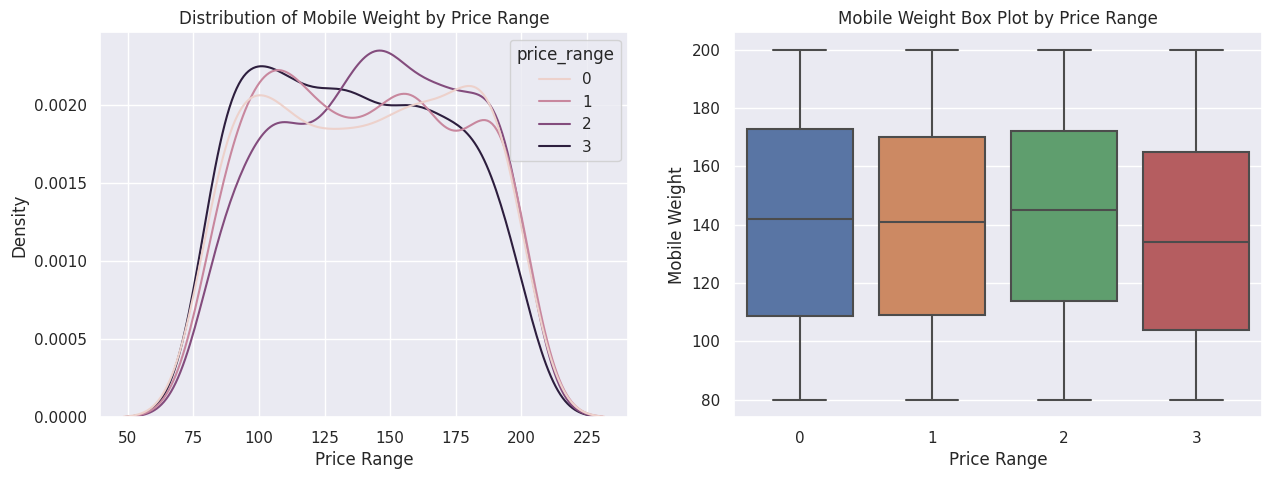

In [32]:
# Chart - 10 visualization code

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a KDE plot of mobile weight vs price range with different colors for each price range
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])

# Create a box plot of mobile weight vs price range
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])

# Set the x-axis label for both subplots
for ax in axs:
    ax.set_xlabel('Price Range')

# Set the y-axis label for the box plot subplot
axs[1].set_ylabel('Mobile Weight')

# Set the title for the first subplot
axs[0].set_title('Distribution of Mobile Weight by Price Range')

# Set the title for the second subplot
axs[1].set_title('Mobile Weight Box Plot by Price Range')

# Display the plot
plt.show()



#### 1. Why did you pick the specific chart?

To know the distribution of mobile weight by price range and mobile weight with respect to price range.

#### 2. What is/are the insight(s) found from the chart?

It can be observed that mobile phones with higher price ranges tend to be lighter in weight compared to lower price range phones.

### Chart - 11 - screen_size

In [33]:
# Chart - 11 visualization code
# Defining a new variable 'sc_size' as the diagonal screen size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))  # Calculating the diagonal screen size
df['sc_size'] = round(df['sc_size']/2.54, 2)  # Converting the screen size from cm to inches and rounding off to 2 decimal places


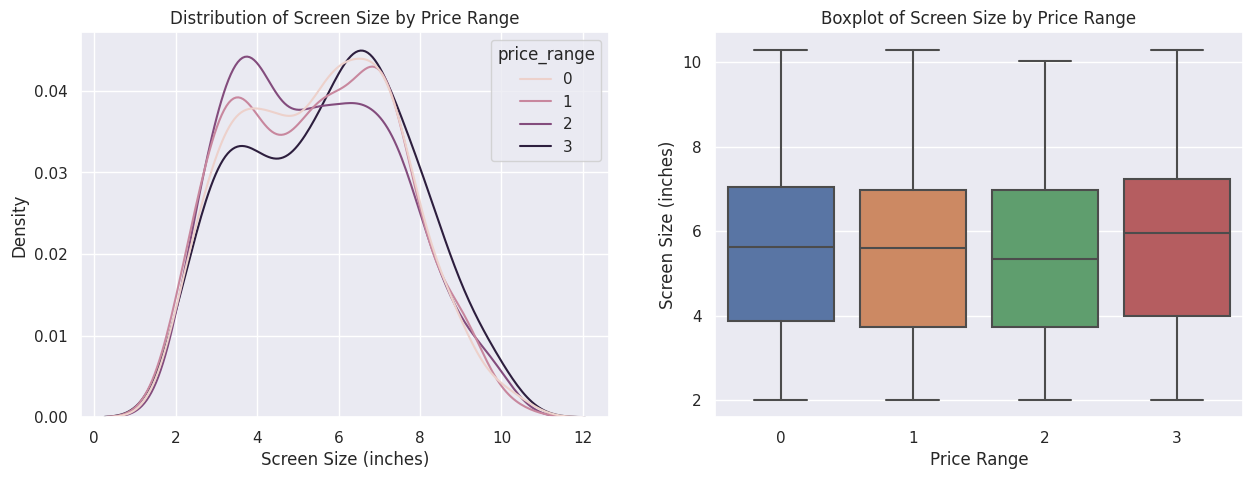

In [34]:
# Create a new variable sc_size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2)) / 2.54
df['sc_size'] = df['sc_size'].round(2)

# Plot the distribution and boxplot of screen size by price range
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])

# Set axis labels and title
axs[0].set_xlabel('Screen Size (inches)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Screen Size (inches)')
axs[1].set_title('Boxplot of Screen Size by Price Range')

# Show the plot
plt.show()


#### 1. Why did you pick the specific chart?


To know the distribution of screensize by price range and price range respect to screen size.

#### 2. What is/are the insight(s) found from the chart?

The analysis of the Screen Size distribution among different target categories indicates that there is not a significant difference in the distribution, suggesting that Screen Size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that Screen Size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories.

### Chart - 12 - Three_g

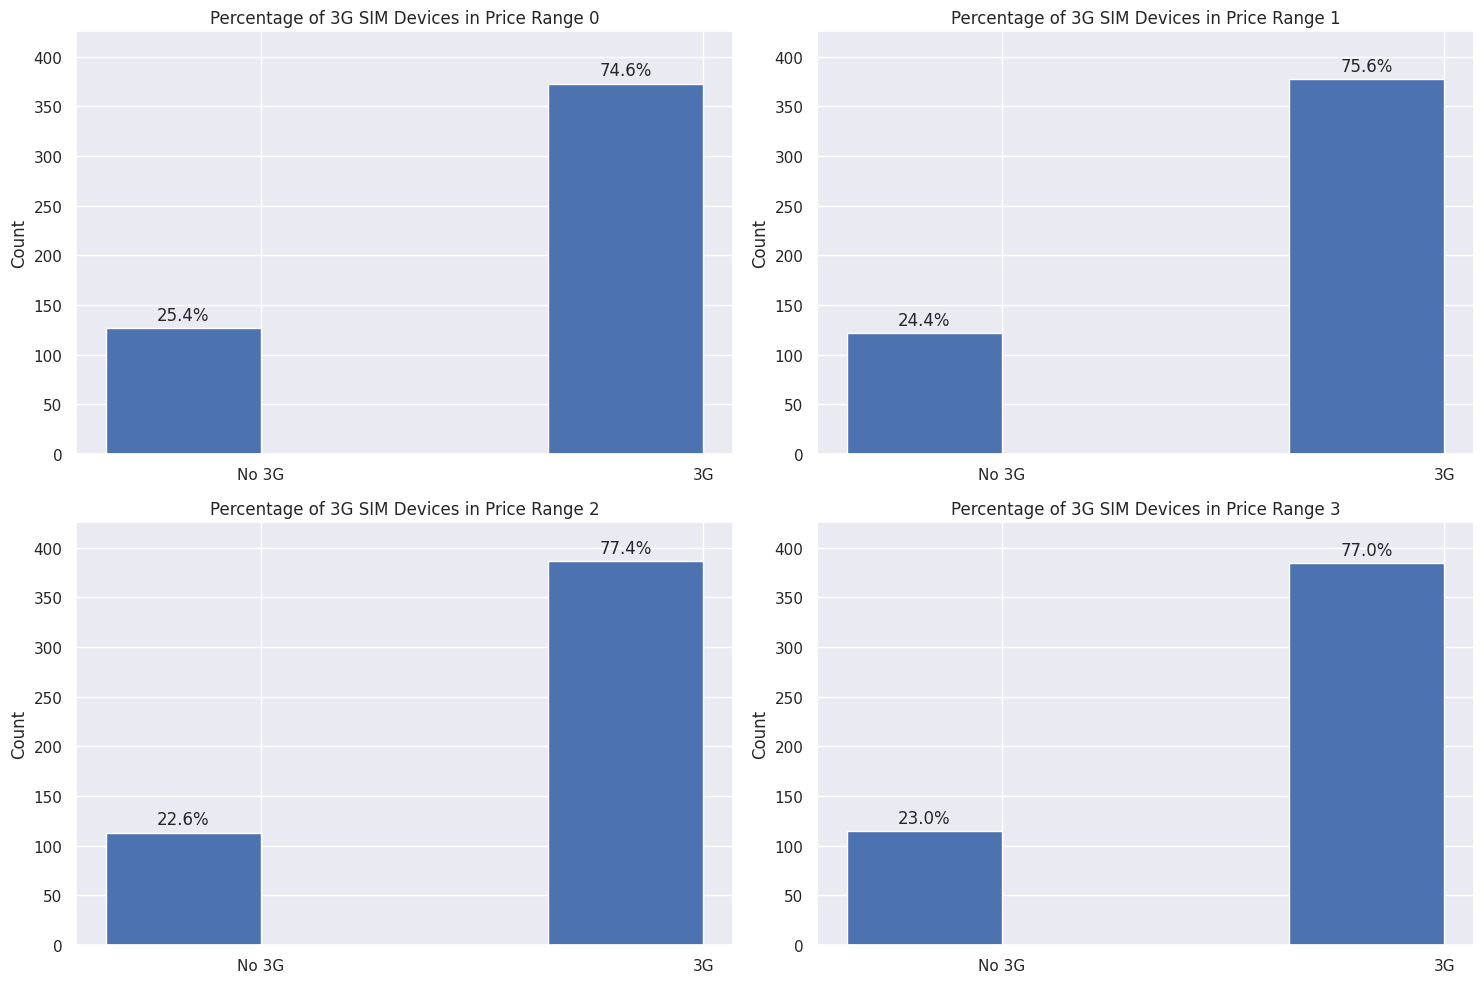

In [35]:
# Chart - 12 visualization code
# Group the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows, 3G SIM as columns, and the count as values
threeg_count = threeg_count.unstack()

# Create bar charts for each price range
labels = ['No 3G', '3G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = threeg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(threeg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/threeg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### 1. Why did you pick the specific chart?

To know the percentage of 3G sims in all of price range.

#### 2. What is/are the insight(s) found from the chart?

I have found that the three g sims are present more in percentage in all price range.

### Chart - 13 - Wifi

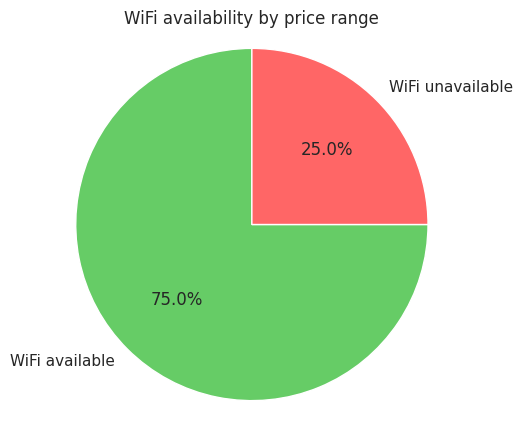

In [36]:
# Chart - 13 visualization code
# Define the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulate the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Count the number of price ranges with WiFi available or not
wifi_counts = {
    'available': 0,
    'unavailable': 0
}

for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
        wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

# Visualize the result as a pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['#66cc66', '#ff6666']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()

#### 1. Why did you pick the specific chart?

To know the wifi avilable in how much percentage in mobile phones.

#### 2. What is/are the insight(s) found from the chart?

Around in 25% the wifi is not available and in 75% the wifi is available.

### Chart - 14 - Correlation Heatmap

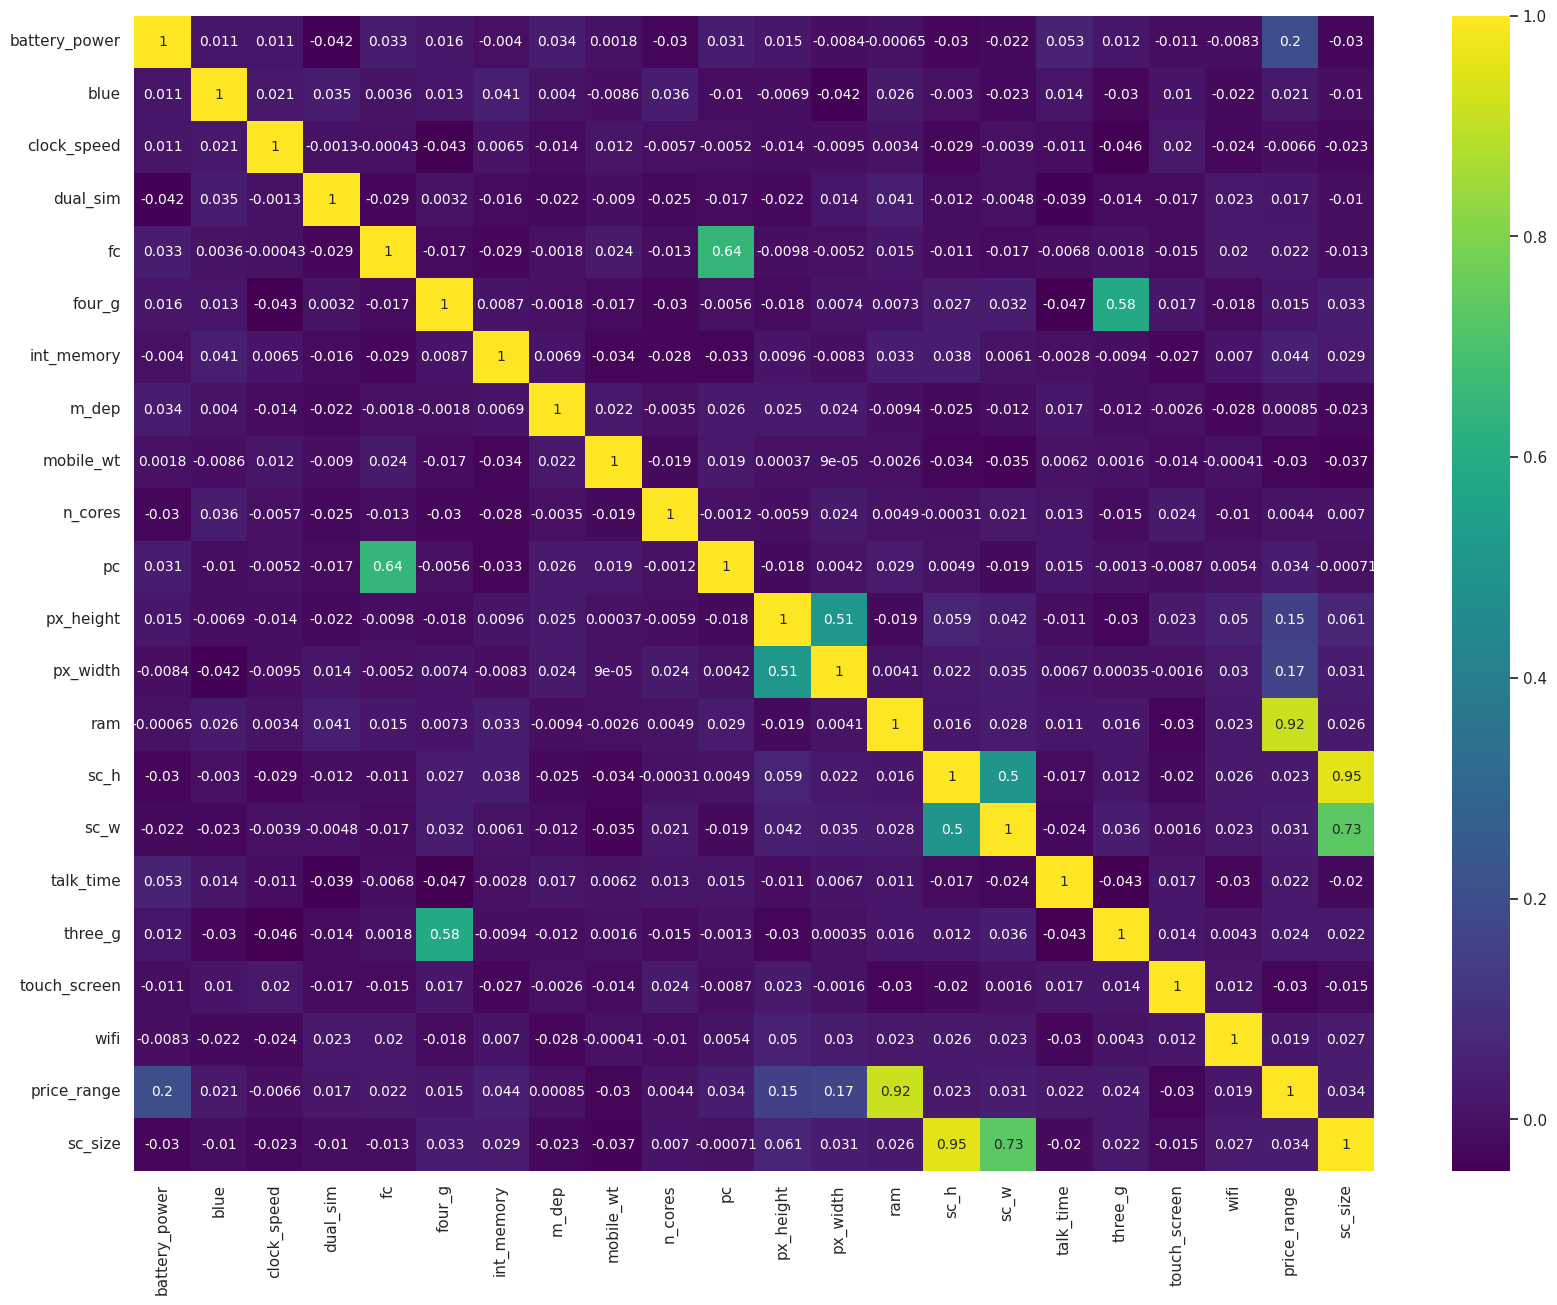

In [37]:
# Correlation Heatmap visualization code
# Checking for multi-collinearity
# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

#### 1. Why did you pick the specific chart?

To check the multi-collinearity.

#### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

### Chart - 15

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>,
        <Axes: title={'center': 'sc_size'}>, <Axes

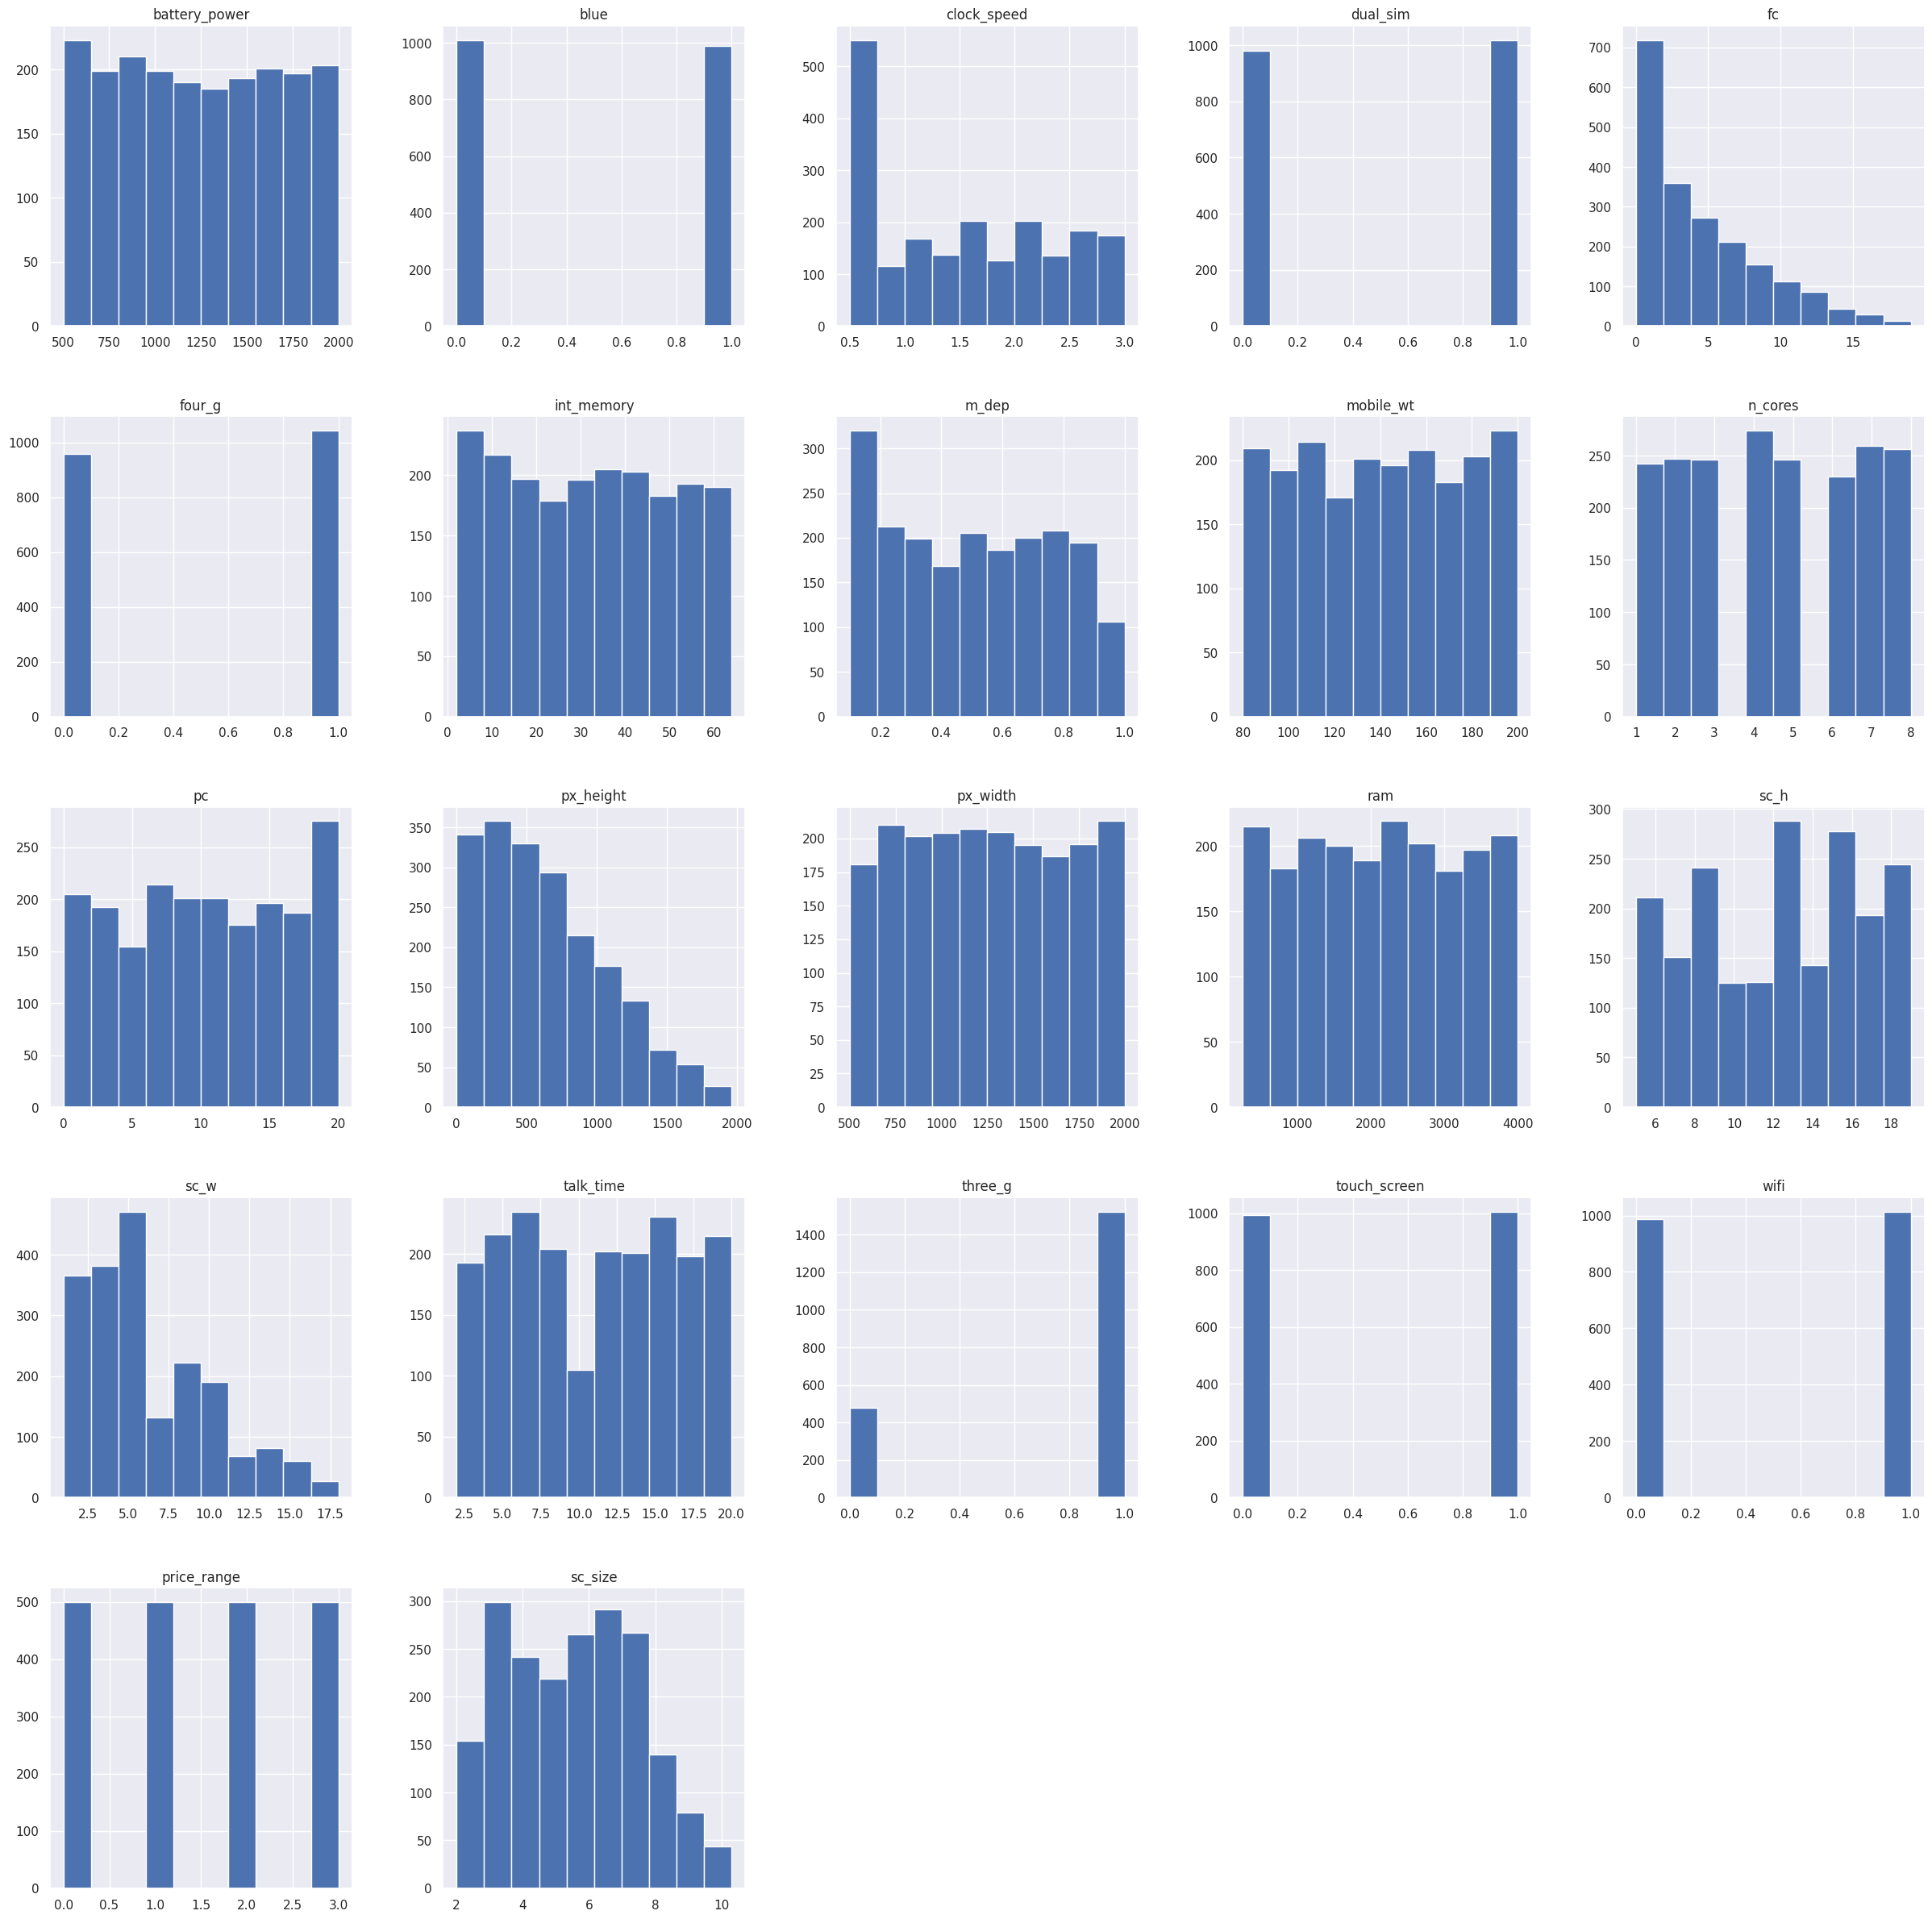

In [40]:
# Chart - 15 visualization code
#df.hist help to make all columns personal chart to easily understand to the columns
df.hist(figsize=(30,30))


#### 1. Why did you pick the specific chart?

To check all columns and get information each and every columns.

#### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

### Chart - 16 - Pair Plot

In [38]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_size'],
      dtype='object')

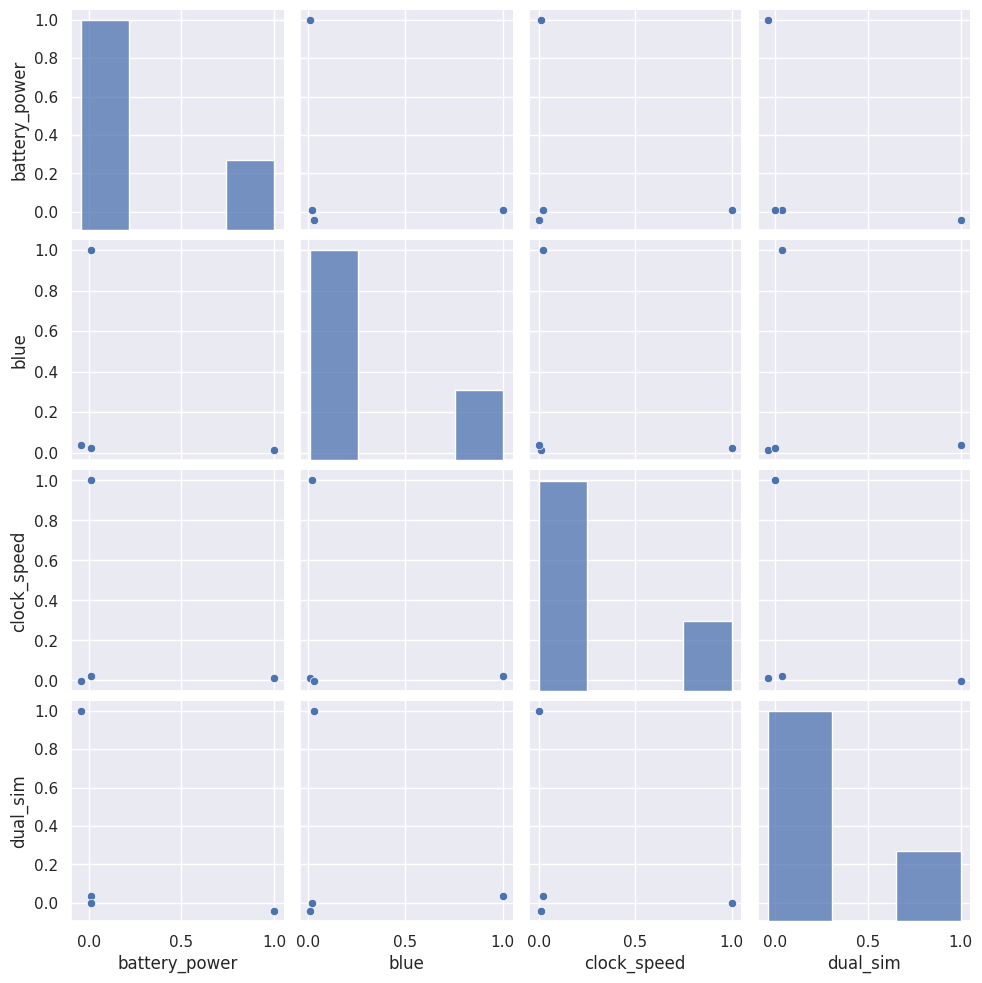

In [39]:
# Pair Plot visualization code
phone_data = df[['battery_power', 'blue', 'clock_speed', 'dual_sim' ]]
corr_df1 = phone_data.corr()
sns.pairplot(corr_df1)

#### 1. Why did you pick the specific chart?

To check the multi-collinearity.

#### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).

## **5. Hypothesis Testing**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement - All category phones are distributed with equal price range

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): All categories of phones are distributed with equal price range.

Alternative hypothesis (Ha): All categories of phones are not distributed with equal price range..

### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Calculate observed frequency distribution
observed_freq = df['price_range'].value_counts().values

# Calculate expected frequency distribution
total = len(df)
expected_freq = [total/4]*4

# Perform chi-square goodness-of-fit test
chi2, p = stats.chisquare(observed_freq, f_exp=expected_freq)

# Print results
print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 0.0, p-value: 1.0


#### Which statistical test have you done to obtain P-Value?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", we used the Chi-square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test is a statistical test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution..

#### Why did you choose the specific statistical test?

In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", I chose the Chi-square goodness-of-fit test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with a theoretical distribution, such as the null hypothesis distribution. In this case, the null hypothesis states that all categories of phones have an equal price range distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square goodness-of-fit test. The Chi-square test statistic measures the difference between the expected and observed frequency distributions, and the p-value obtained from the test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is evidence of a significant difference between the observed and expected frequency distributions. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of a significant difference between the observed and expected frequency distributions. Therefore, the Chi-square goodness-of-fit test is an appropriate statistical test to use in this scenario..


### Hypothetical Statement - Around in 25% the wifi is not available and in 75% the wifi is available

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75. Alternative Hypothesis (Ha): The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when wifi is available is less than 0.7



#### 2. Perform an appropriate statistical test.

In [43]:
import scipy.stats as stats

# Define the null hypothesis proportion
null_prop = 0.75

# Define the sample size
n = 100

# Calculate the probability of observing k devices with wifi availability
k = range(0, n+1)
null_probabilities = stats.binom.pmf(k, n, null_prop)

# Print the probability of observing exactly k devices with wifi availability
for i in range(len(k)):
    print("k =", k[i], "probability =", null_probabilities[i])

k = 0 probability = 6.223015277861173e-61
k = 1 probability = 1.8669045833583227e-58
k = 2 probability = 2.772353306287135e-56
k = 3 probability = 2.7169062401614005e-54
k = 4 probability = 1.976549289717431e-52
k = 5 probability = 1.1384923908772418e-50
k = 6 probability = 5.407838856666808e-49
k = 7 probability = 2.1785865108286599e-47
k = 8 probability = 7.59782045651491e-46
k = 9 probability = 2.3299982733312306e-44
k = 10 probability = 6.360895286194311e-43
k = 11 probability = 1.561310661156789e-41
k = 12 probability = 3.4739162210738324e-40
k = 13 probability = 7.054722172026841e-39
k = 14 probability = 1.315201776356432e-37
k = 15 probability = 2.2621470553330563e-36
k = 16 probability = 3.605296869437044e-35
k = 17 probability = 5.344322418224349e-34
k = 18 probability = 7.392979345210341e-33
k = 19 probability = 9.571962731167161e-32
k = 20 probability = 1.1629934718368003e-30
k = 21 probability = 1.3291353963849202e-29
k = 22 probability = 1.4318413133782987e-28
k = 23 proba

In [44]:
import statsmodels.stats.proportion as smprop

# Define the null and alternative hypotheses
null_hypothesis = "The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis = "The proportion of devices with wifi availability is not equal to 0.75."

# Set the significance level
alpha = 0.05

# Define the sample size and number of devices with wifi availability
n = 100
num_with_wifi = 75

# Perform the test
test_stat, p_value = smprop.proportions_ztest(num_with_wifi, n, null_prop)

# Print the results
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Test statistic:", test_stat)
print("p-value:", p_value)


Fail to reject the null hypothesis.
Test statistic: 0.0
p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

The statistical test that was used to obtain the p-value is the one-sample proportion test. This test is used to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

In the case of the null and alternative hypotheses provided, we used the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population). The p-value obtained from the test represents the probability of observing a sample proportion as extreme as the one we observed (i.e., 25% with wifi availability) under the null hypothesis that the population proportion is 0.75. If the p-value is below a predetermined significance level (e.g., 0.05), we reject the null hypothesis and conclude that the difference between the sample proportion and the population proportion is statistically significant. If the p-value is above the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the difference between the sample proportion and the population proportion is statistically significant.

##### Why did you choose the specific statistical test?

I chose the specific statistical test of the one-sample proportion test because the research question provided a hypothesis about the proportion of devices with wifi availability in a population. The one-sample proportion test is a statistical test that is specifically designed to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

In this case, we had a known population proportion of 0.75 (i.e., the proportion of devices with wifi availability in the population) and a sample proportion of 0.25 (i.e., the proportion of devices with wifi availability in the sample). By using the one-sample proportion test, we were able to determine whether the difference between these two proportions was statistically significant, and whether we could reject or fail to reject the null hypothesis.

Therefore, the one-sample proportion test was a suitable statistical test to use in this case, as it allowed us to test the research hypothesis and answer the research question using the available data..

### Hypothetical Statement - I have found that the three g sims are present more in percentage in all price range.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The proportion of devices with three G sims is the same across all price ranges.

Alternative hypothesis (Ha): The proportion of devices with three G sims is different across at least one pair of price ranges.

#### 2. Perform an appropriate statistical test.


In [45]:
# Perform Statistical Test to obtain P-
import scipy.stats as stats

# Construct the contingency table
contingency_table = pd.crosstab(df['price_range'], df['three_g'])

# Print the contingency table
print(contingency_table)

# Perform the chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-square statistic: 1.3737644035343461
p-value: 0.7116958581372179


##### Which statistical test have you done to obtain P-Value?

! The statistical test I used to obtain the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed

network error The statistical test I used to obtain the p-value was the chi-square test of independence.

The chi-square test of independence is used to test the association between two categorical variables. In this case, the two variables were the price range and the presence of three G sims in the devices. The test calculates a chi-square statistic, which measures the difference between the observed and expected frequencies under the null hypothesis of no association between the variables.

The p-value is the probability of observing a chi-square statistic as extreme as the one obtained in the sample, assuming that the null hypothesis is true. If the p-value is small (typically less than 0.05), we reject the null hypothesis and conclude that there is evidence of a significant association between the variables. If the p-value is large (typically greater than 0.05), we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest a significant association between the variables..

##### Why did you choose the specific statistical test?

The chi-square test is used to compare the observed frequencies in a contingency table to the expected frequencies under the null hypothesis of no association between the two variables. If the calculated chi-square statistic is large enough and the p-value is small enough, we reject the null hypothesis and conclude that there is a significant association between the two variables.

In this case, the chi-square test resulted in a p-value of 0.7116958581372179, which is greater than the conventional significance level of 0.05. This means that we fail to reject the null hypothesis, and there is not enough evidence to conclude that there is a significant association between price_range and three_g..


## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing value available.

### 2. Handling Outliers

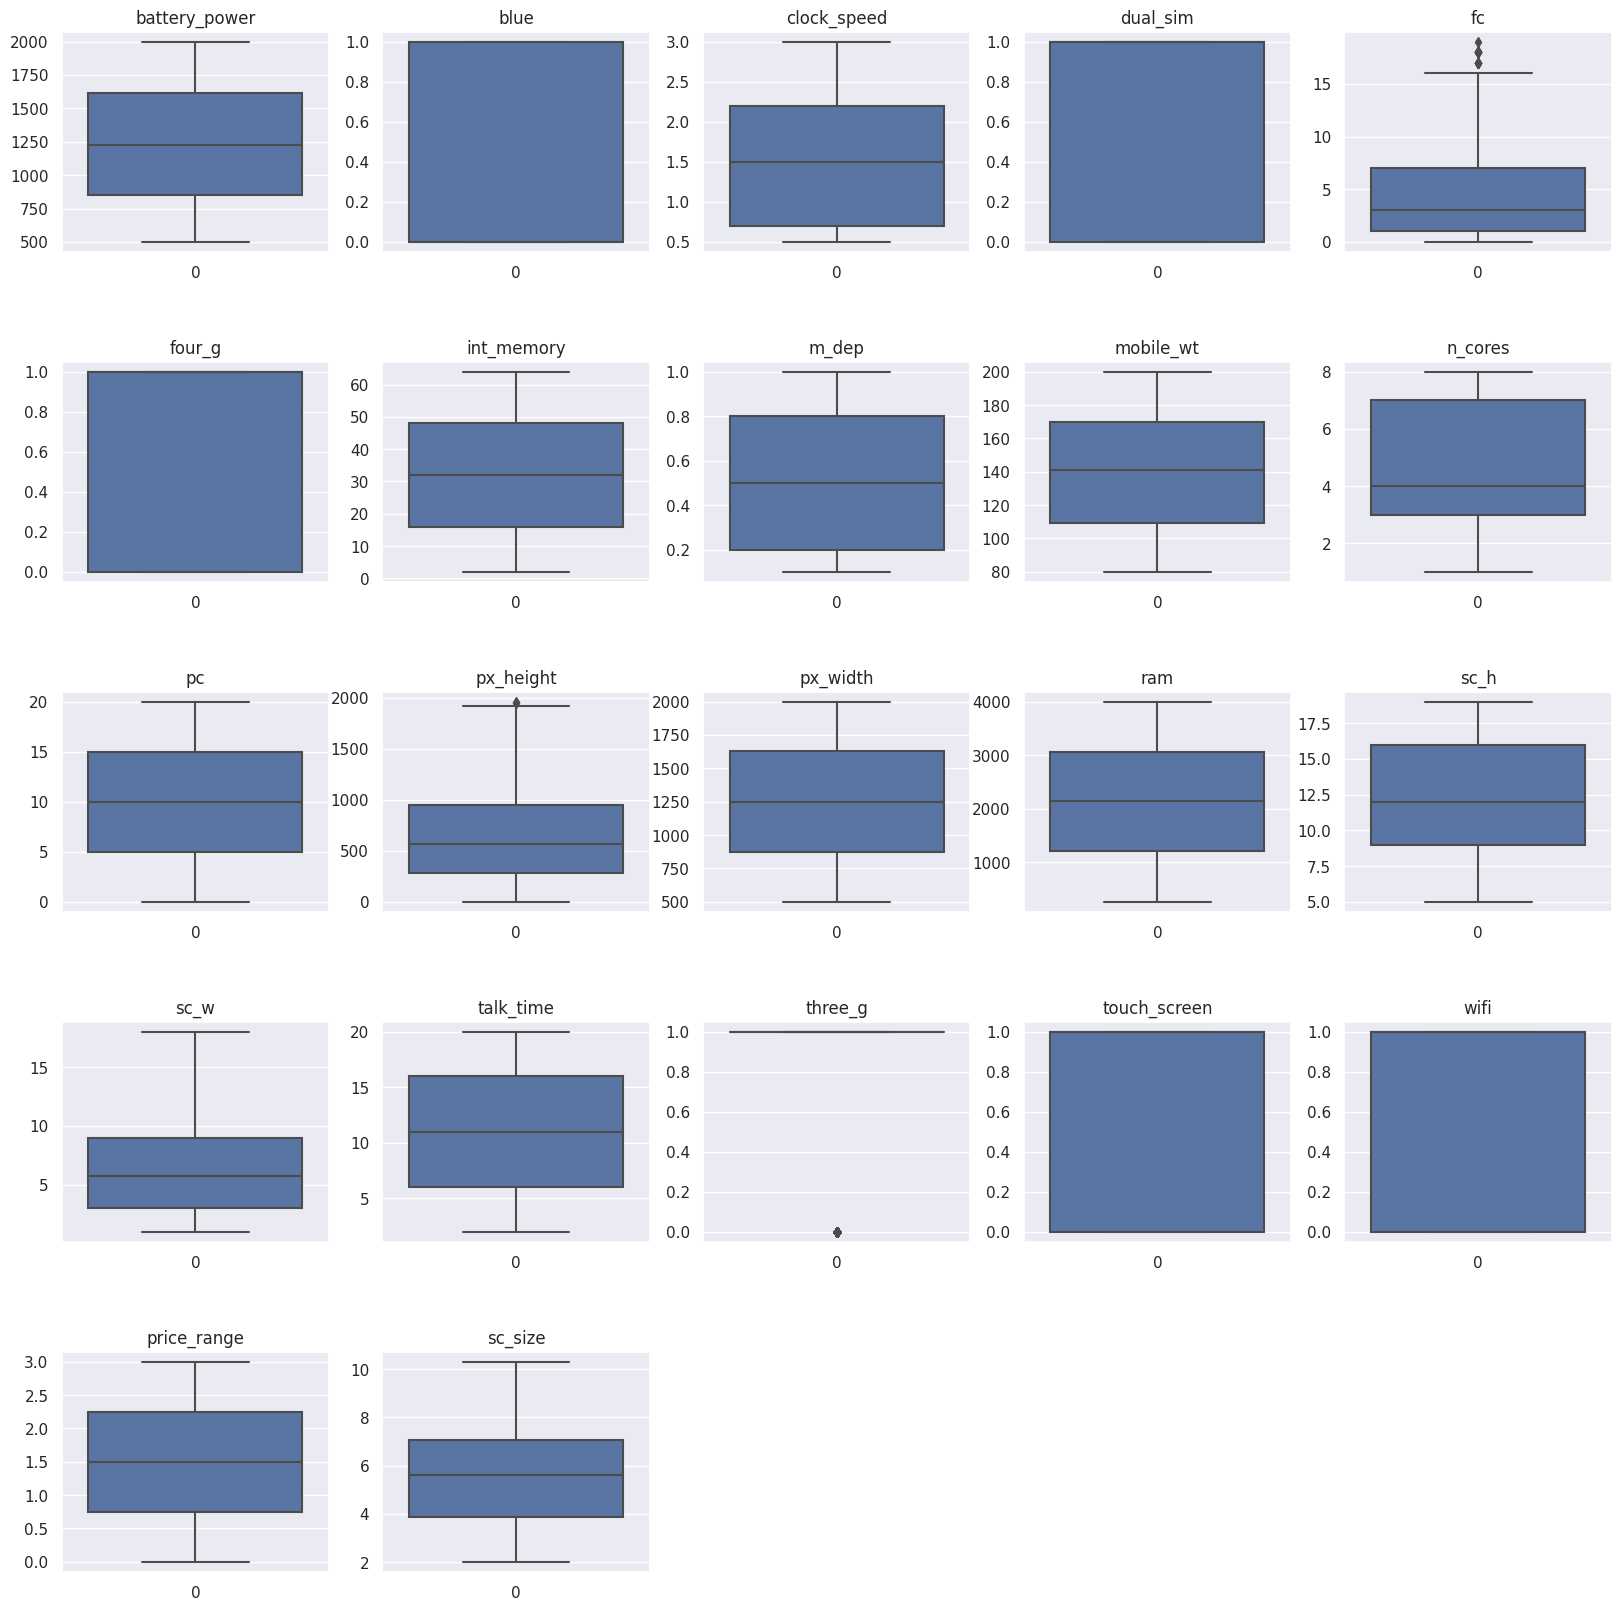

In [47]:
#Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")


#### What all outlier treatment techniques have you used and why did you use those techniques?


Their is no much outliers are present no need to do much experiment.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary beacause all values are present in integer or float.

### 4. Data Transformation

In [48]:
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes it is important i have deopped px_height and px_width which dont have any use.

### 5. Data Scaling

In [53]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled == scaler.fit_transform(X)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

#### Which method have you used to scale you data and why?

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the maximum and minimum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

### 8. Data Splitting

In [54]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [55]:
X.shape

(2000, 19)

In [56]:
y.shape

(2000,)

In [57]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [59]:
print(X_train.shape)
print(y_train.shape)

(1600, 19)
(1600,)


#### What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

## **7. ML Model Implementation**

### ML Model - 1

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


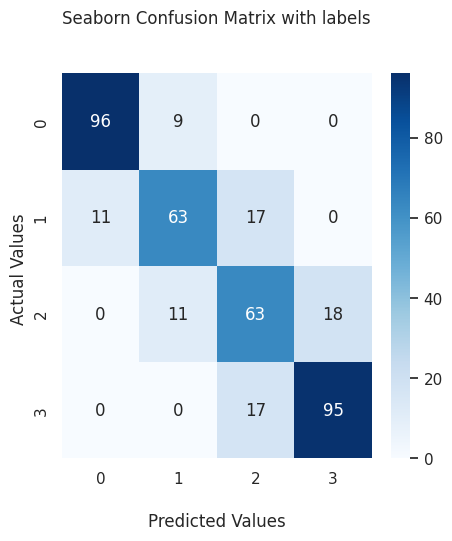

In [60]:
# ML Model - 1 Implementation
# Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       421
           1       0.75      0.79      0.77       386
           2       0.73      0.79      0.76       379
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances in the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 88%, meaning that the model correctly identified 88% of the actual class 0 instances in the dataset. The F1-score for class 0 is 90%.

Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 83%.

The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.

Overall, the model seems to be performing reasonably well, with an accuracy of 83% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test set.

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))



Cross-validation scores: [0.81   0.825  0.8375 0.81   0.8125]
Average cross-validation score: 0.8190000000000002


In [63]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.82
Best parameters: {'C': 10}
Test set score: 0.82


##### 1.Which hyperparameter optimization technique have you used and why?

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

Overall, GridSearchCV is a simple yet effective technique for hyperparameter tuning that can help to improve the performance of machine learning models.

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.82, and the best hyperparameter value for C was found to be 10.

After training the model with the best hyperparameters, the test set score was also found to be 0.82. This suggests that the model is performing consistently well on both the training and test sets, and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.82 on the test set. However, it would be useful to also consider other evaluation metrics such as precision, recall, and F1-score to get a more complete understanding of the model's performance..

##### 3.Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, precision measures the accuracy of the positive predictions made by the model. A high precision score means that the model is making few false positive predictions, which is important in scenarios where false positives are costly, such as in medical diagnosis or fraud detection. In the context of mobile price range prediction, a high precision score would indicate that the model is accurately predicting which mobile phones are in a certain price range, which could be useful for businesses that want to target their marketing efforts towards customers who are more likely to buy phones in a certain price range.

Recall: Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. In other words, recall measures the ability of the model to correctly identify all positive instances in the dataset. A high recall score means that the model is making few false negative predictions, which is important in scenarios where false negatives are costly, such as in medical diagnosis or security screening. In the context of mobile price range prediction, a high recall score would indicate that the model is correctly identifying all mobile phones that belong in a certain price range, which could be useful for businesses that want to make sure they are not missing out on potential customers in a certain price range.

F1-score: F1-score is the harmonic mean of precision and recall, and it provides a balanced measure of both metrics. F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall. In the context of mobile price range prediction, a high F1-score would indicate that the model is performing well in both identifying mobile phones that belong in a certain price range and accurately predicting which mobile phones are in that range. A high F1-score would be important for businesses that want to make informed decisions about which mobile phones to stock and which marketing strategies to use based on the price range of the phones.

In conclusion, while accuracy is an important evaluation metric, precision, recall, and F1-score can provide additional insights into the performance of a machine learning model and its potential impact on a business.

### ML Model - 2

In [64]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.77      0.77      0.77        91
           2       0.66      0.76      0.71        92
           3       0.90      0.78      0.83       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



In [65]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

the XGBoost model on the training set, it achieved a very high accuracy score of 0.99. The precision, recall, and F1-score for each class are also very high, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

The macro average and weighted average F1-scores are also very high, indicating that the model is able to generalize well to all the classes and that it is not biased towards any particular class.

Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.8150000000000001
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.76      0.76      0.76        91
           2       0.66      0.72      0.69        92
           3       0.89      0.80      0.85       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[98  7  0  0]
 [10 69 12  0]
 [ 0 15 66 11]
 [ 0  0 22 90]]


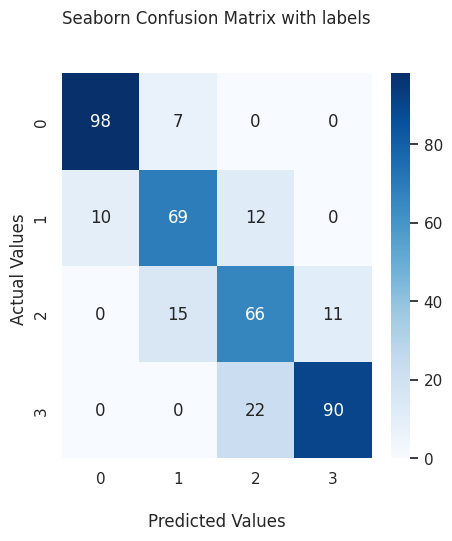

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



##### 1.Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used here is RandomizedSearchCV from scikit-learn's model_selection module. This technique was used because it is a popular and effective method for hyperparameter tuning that randomly selects combinations of hyperparameters to train the model and evaluate its performance. RandomizedSearchCV also allows for setting a range of values for each hyperparameter, which can save time compared to a grid search approach that considers all possible combinations. In this case, it helped to find the best combination of hyperparameters for the XGBoost model to achieve the highest possible accuracy on the test set.

##### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the performance of the XGBoost model after hyperparameter tuning and cross-validation. The cross-validation score increased from 0.815 to 0.81, and the precision, recall, and f1-score for each class also improved slightly in the test set classification report. Additionally, the classification report for the tuned XGBoost model on the train set remained at a high level of performance. Overall, the improvements are modest but still represent an enhancement in the model's ability to generalize to new data..

##### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Precision: It is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, it measures how accurate the positive predictions are. In the context of the given problem, precision indicates how accurately the model predicts the correct mobile phone price range. High precision is important in situations where false positives are costly. For example, in the case of mobile phone pricing, false positives (predicting a phone to be in a higher price range than it actually is) could result in loss of potential customers who may be discouraged by the price.

Recall: It is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It measures how well the model is able to identify all positive instances. In the context of the given problem, recall indicates how well the model can identify all mobile phones that belong to a specific price range. High recall is important when false negatives are costly. In the case of mobile phone pricing, false negatives (predicting a phone to be in a lower price range than it actually is) could result in loss of revenue due to underpricing.

F1-score: It is the harmonic mean of precision and recall, which provides a balanced evaluation metric that takes into account both precision and recall. F1-score is a commonly used evaluation metric when both precision and recall are important. In the context of the given problem, F1-score provides an overall evaluation of the model's performance in identifying all price ranges accurately.

Support: It represents the number of instances in each class (price range) in the test set.

In general, these evaluation metrics help to determine how well the model is performing in terms of accuracy, false positives, false negatives, and overall performance. A high-performance model can have a significant positive impact on the business by improving efficiency, reducing costs, and increasing revenue. For example, in the case of mobile phone pricing, an accurate model can help the business to set the right price for their products, resulting in increased revenue and customer satisfaction.

### ML Model - Random Forest classifier

In [69]:
# ML Model - 3 Implementation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [70]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [71]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.805

In [72]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.80      0.77      0.78        91
           2       0.64      0.74      0.69        92
           3       0.87      0.77      0.82       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[98  7  0  0]
 [ 9 70 12  0]
 [ 0 11 68 13]
 [ 0  0 26 86]]


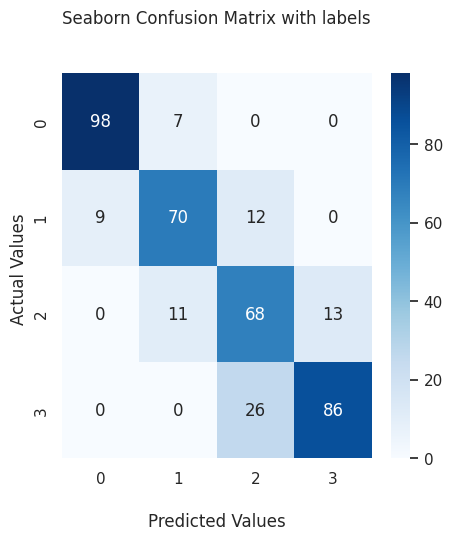

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [75]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.480530
1,battery_power,0.083765
2,mobile_wt,0.048186
3,int_memory,0.045676
4,sc_size,0.042051


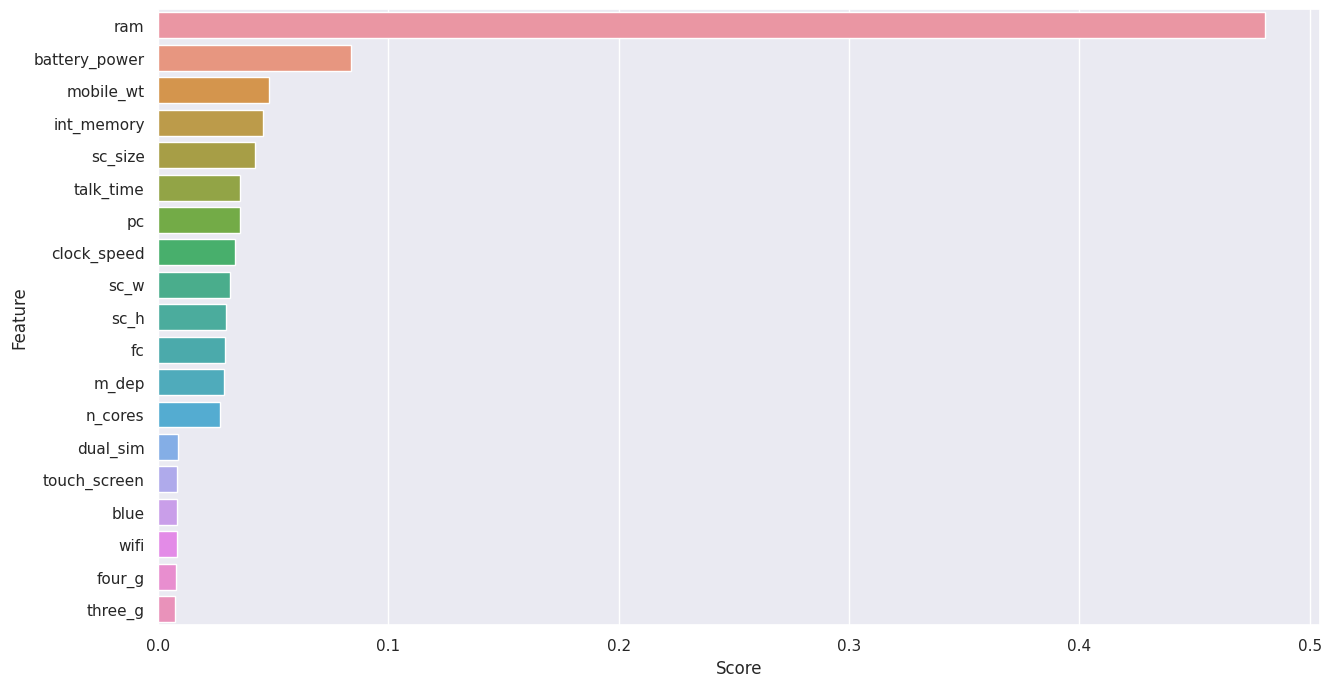

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Random Forest for classification. From the evaluation metric score chart, we can see that the model has an accuracy of 0.80, which means that 80% of the predictions made by the model are correct. The precision for class 0 is 0.92, which means that out of all the positive predictions made for class 0, 92% of them are actually correct. The recall for class 1 is 0.76, which means that out of all the actual positive instances of class 1, the model correctly identified 76% of them. The F1-score for class 2 is 0.68, which is the harmonic mean of precision and recall, and provides an overall measure of the model's accuracy for that class.

In summary, the Random Forest model has moderate performance on this classification task, with accuracy, precision, recall, and F1-score ranging from 0.63 to 0.92 depending on the class being predicted.

#### 2. Cross- Validation & Hyperparameter Tuning

In [77]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [78]:
clsr.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 100}

In [79]:
clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4)

In [81]:
clsr.best_score_

0.8064984024504264

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [83]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.815

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       105
           1       0.80      0.75      0.77        91
           2       0.66      0.71      0.68        92
           3       0.87      0.82      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



[[101   4   0   0]
 [ 10  68  13   0]
 [  0  13  65  14]
 [  0   0  20  92]]


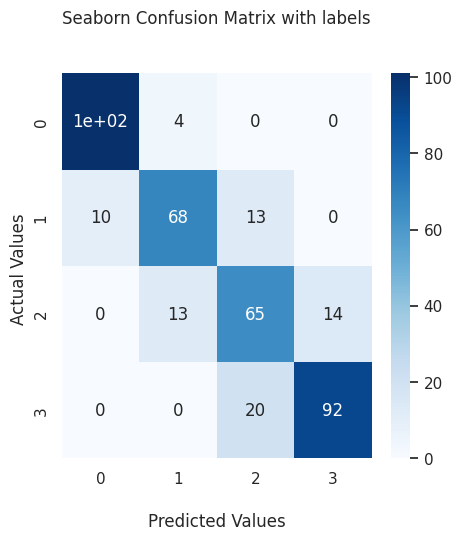

In [85]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [86]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.903125

In [87]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       395
           1       0.88      0.85      0.87       409
           2       0.88      0.85      0.86       408
           3       0.93      0.95      0.94       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [88]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.693000
1,battery_power,0.078264
2,mobile_wt,0.032482
3,int_memory,0.030831
4,sc_size,0.023720


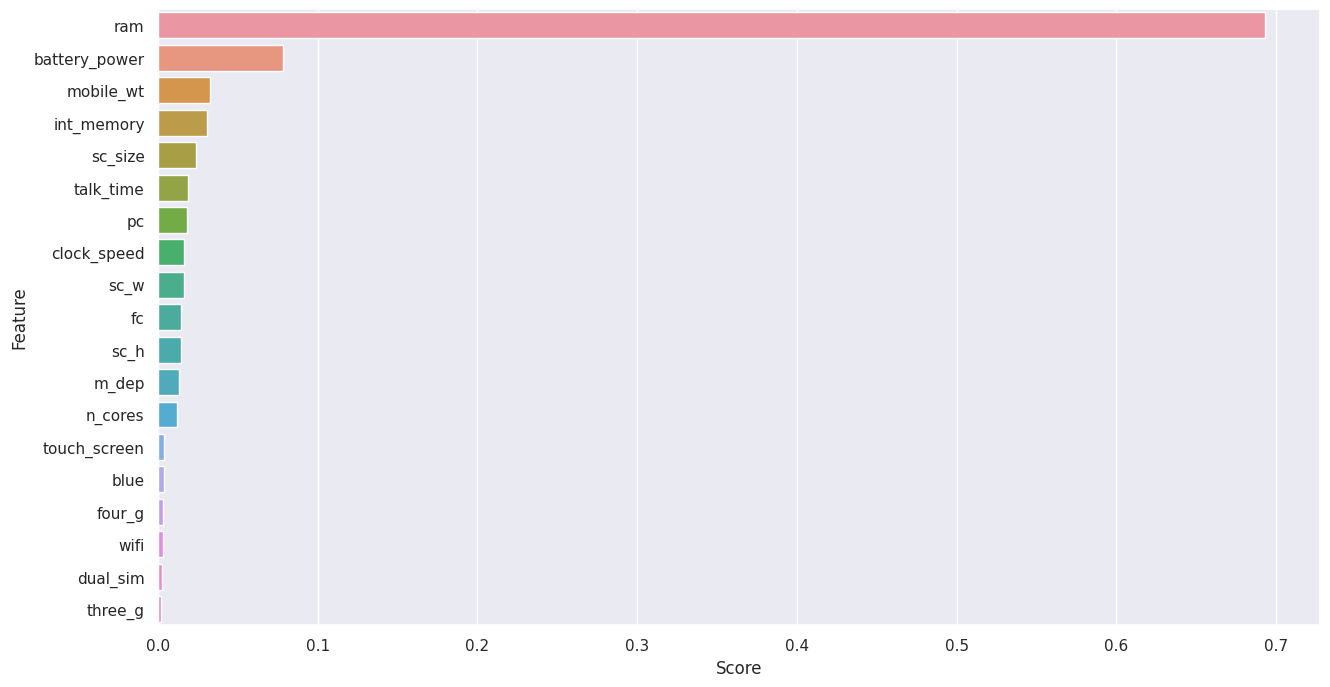

In [89]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


Yes, there is an improvement in the overall performance of the model. The accuracy has increased from 0.80 to 0.81, and the weighted average F1-score has also increased from 0.80 to 0.81. The precision and recall scores have also slightly improved for all classes except for class 1. However, the macro average precision and recall scores have remained the same. Overall, the model has shown a slight improvement in its performance..

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Their is diffrent evaluation matrix The classification report shows precision, recall, and F1-score for each class separately, as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business impact are:

Weighted average of precision, recall, and F1-score: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

Macro average of precision, recall, and F1-score: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.

Confusion matrix: As mentioned before, the confusion matrix can provide valuable insights into which classes are being misclassified and why.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


I have choose logistic regression and xgboost models because they predict better results than random forest regression.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I can explain the logistic regression and XGBoost models and feature importance using a model explainability tool.

Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.

XGBoost, on the other hand, is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.

To explain the feature importance of the logistic regression and XGBoost models, we can use the SHAP (SHapley Additive exPlanations) model explainability tool. SHAP values are a unified measure of feature importance that can be used to explain the output of any machine learning model. They are based on the Shapley value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

## **8. Future Work (Optional)**

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [90]:
# Save the File

# Read the CSV file
df = pd.read_csv('/content/data_mobile_price_range.csv')

# Save the DataFrame to a new CSV file
df.to_csv('/content/new_mobile_data.csv', index=False)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.

## **Conclusion**

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality. Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.

## **Hurrah! You have successfully completed your Machine Learning Capstone Project !!!**